# Project Title (Supermart Grocery Sales)

Problem Statement:
Filtering through the dataset, it is valid to make some assertions that the store owner is most likely looking into daily sales without a more indept view of where the parameters are more likely beneficial to her business. She probably do not have an idea that she can do more or upscale better. From observations, we discovered what we can do to make a more detailed analysis for her business in the following areas:
1. Which region makes the most profit
2. Which city makes the most profit
3. Which category and sub-category makes the most
4. Which category and sub-category was patronized more
5. Most Outstanding customer in terms of patronage
6. In what year did the supermart make the highest average profit?
7. Correlation between sales and discount

### A short description of the project

This project is a supermart grocrey sales dataset which shows important details of daily sales of customers in different regions and cities in a particular state called "Tamil Nadu".



In [2]:
#import python libraries for data manipulation and visualization

import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Inspection

load data set with this code:df=pd.read_csv('filename.csv')
This data was downloaded from Kaggle,click on this link to access the data set:
https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset

supermart data has 9994 Rows and 11 columns with no missing values.

from my observations, Date data type and column names will be modified.
    

In [3]:
#load the data
sales_record = pd.read_csv('Supermart Grocery Sales.csv')

In [4]:
#how many rows and columns?
#uses df.shape to check the total rows and columns
sales_record.shape

(9994, 11)

In [5]:
#does it have missing values?
#lets check if our data has missing values using.isna().sum() to give us the total number of the missing values.
sales_record.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [6]:
#let's view our first 10 data set by using the .head()function:
sales_record.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [7]:
## this is used to check the datatypes of your data columns and if they have thier supposed data types.
##we can see that order date does not have the perfect data type and some column names have whitespace.
sales_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


# Data Cleansing
To make my data clean, i will change the date format and remove whitespaces from my column names.
Whitespace is the space before and/or after the actual text.
we can remove the whitespace with replace function.


In [8]:
#To check if there are null values in our dataset
sales_record.isna()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#To check the total null values in our dataset
sales_record.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [10]:
#Removing  whitespaces
#lets view our columns: 

sales_record.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [11]:
#removing whitespaces in our columns  with str.replace function from ' ' to '_'
sales_record.columns = sales_record.columns.str.replace(' ', '_')

In [12]:
#print the replaced column to the result
sales_record.columns

Index(['Order_ID', 'Customer_Name', 'Category', 'Sub_Category', 'City',
       'Order_Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [13]:
#now lets change our date column datatype to the right dtype using to_datetime from panda library:
sales_record['Order_Date'] = pd.to_datetime(sales_record['Order_Date'])

In [14]:
#run this code and see the changes in our Order_Date column .
sales_record['Order_Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: Order_Date, Length: 9994, dtype: datetime64[ns]

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

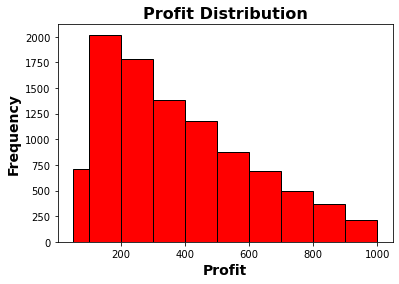

In [48]:
#using Histogram to show the profit distribution

plt.hist(sales_record['Profit'],color='red' ,bins=[ 50, 100, 200, 300, 400, 500, 600, 700, 800, 900,1000], edgecolor="black") 
plt.title('Profit Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Profit',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

### We plotted our profit column using Histogram, this chart shows that our profit is right skewed(mean>median).
We assumed our profits may have outliers, we used BoxPlot chart to check this assumption.


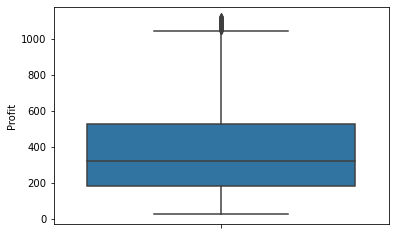

In [20]:
##using Box plot to show Outliers
sns.boxplot(y=sales_record['Profit'])
plt.show()

### Using the Boxplot, we can see outliers(black shade) on our Profits

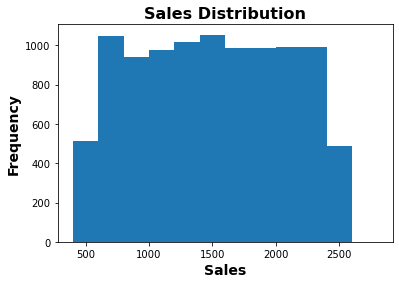

In [50]:
#using Histogram to plot our sales
plt.hist(sales_record['Sales'],bins=list(range(400,3000,200)))
plt.title('Sales Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Sales',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')

plt.show()

### Here we can see the frequency of our sales, the number of times  sales from the range of 500-600 
### turned up(520 times),etc.

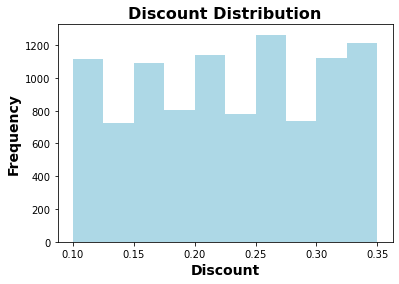

In [22]:
#Using histogram to plot Discount
plt.hist(sales_record.Discount,color='lightblue')
plt.title('Discount Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Discount',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.show()

### In this chart, our discount varies from 0.10 to 0.35.
From 0.10 to 0.12, we have close to frequency of 1100.
From 0.13 to 0.14, we have frequency of 750,etc.

###  Task 1. Which Region makes the most Profit?

In [23]:
#Shwing which region with the highest profit
sales_record.groupby('Region').Profit.sum()

Region
Central     856806.84
East       1074345.58
North          401.28
South       623562.89
West       1192004.61
Name: Profit, dtype: float64

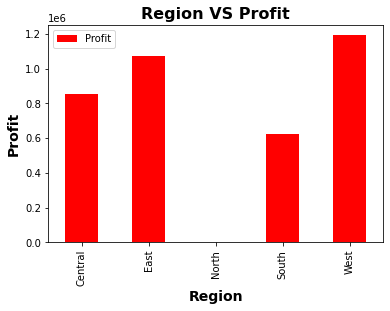

In [24]:
#Plotting the graph of the highest profit by region, adding labels and title to the chart as well
sales_record.groupby('Region')[['Profit']].sum().plot.bar(color='red')
plt.title('Region VS Profit',fontsize=16,fontweight='bold')
plt.xlabel('Region',fontsize=14,fontweight='bold')
plt.ylabel('Profit',fontsize=14,fontweight='bold')
plt.show()

## From the chart, we can tell that West Region made more profit.

## Task 2. Which City Makes More Profit?

In [25]:
#Grouping sales by profit and checking the average to see the exact city that made the most profit
sales_record.groupby('City')[['Profit']].mean().sort_values(by='Profit',ascending=False)


,Profit
City,
Vellore,400.167839
Perambalur,394.313802
Karur,393.734744
Bodi,392.884910
Pudukottai,381.564256
Trichy,381.120280
Ramanadhapuram,377.555891
Dharmapuri,376.577261
Kanyakumari,375.202048


Text(0, 0.5, 'Profit')

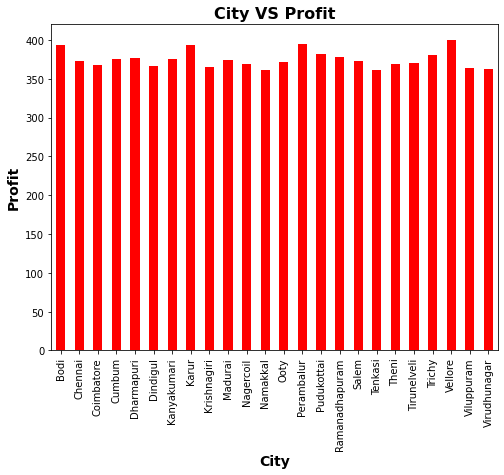

In [26]:
#Plotting a bar chart to show the city with the highest profit, adding labels and title to the chart as well
sales_record_city=sales_record.groupby('City')[['Profit']].mean().plot.bar(color='red',figsize=(8,6),legend=False)
plt.title('City VS Profit',fontsize=16,fontweight='bold')
plt.xlabel('City',fontsize=14,fontweight='bold')
plt.ylabel('Profit',fontsize=14,fontweight='bold')


## Vellore City has the highest profit from our Bar Chart

## Task 3a: Which Category made the highest Profit?

In [27]:
#to do this we grouped the profit by category, summing this up and sorting by profit
sales_record.groupby('Category')[['Profit']].sum().sort_values(by='Profit',ascending=False)

,Profit
Category,
Snacks,568178.85
"Eggs, Meat & Fish",567357.22
Fruits & Veggies,530400.38
Food Grains,529162.64
Bakery,528521.06
Beverages,525605.76
Oil & Masala,497895.29


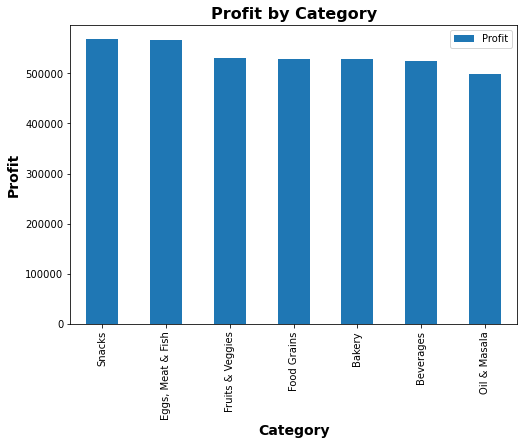

In [28]:
#plotting Bar Chart for Profit by Category, adding labels and title to the chart as well
sales_record.groupby('Category')[['Profit']].sum().sort_values(by='Profit',ascending=False).plot.bar(figsize=(8,5.5))
plt.title('Profit by Category',fontsize=16,fontweight='bold')
plt.xlabel('Category',fontsize=14,fontweight='bold')
plt.ylabel('Profit',fontsize=14,fontweight='bold')
plt.show()


## The Category that made the most Profit was Snacks, followed closely by Eggs,Meat & Fish.

## Task 3B:Which Sub Category was patronized more?

In [29]:
#grouping sub_category by Category
sales_record.groupby('Category')[['Sub_Category']].count().sort_values(by='Sub_Category',ascending=False)

,Sub_Category
Category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


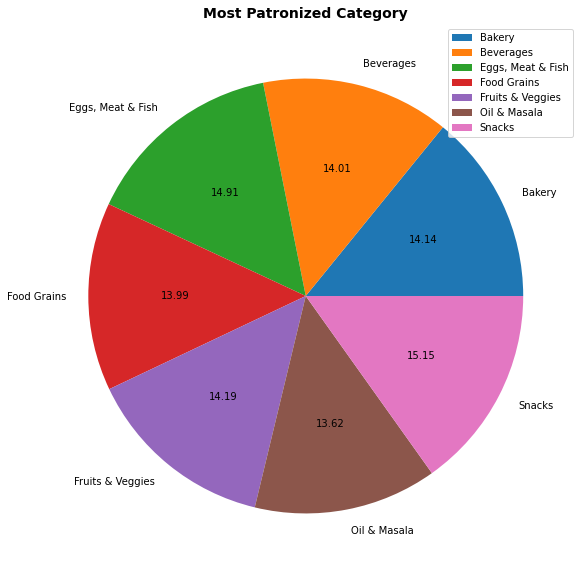

In [30]:
#plotting Pie Chart for Sub_Category by Category, adding labels and title to the chart as well
sales_record.groupby('Category')[['Sub_Category']].count().plot(kind='pie',figsize=(10,10),subplots=True,legend=True,autopct='%.2f')
plt.ylabel("")                                                                                                  
plt.title('Most Patronized Category',fontsize=14,fontweight='bold')
plt.show()

## The pie chart shows that Snacks was the most patronized Category with 15.15%

## Task 5: Who is the most outstanding customer in terms of patronage?

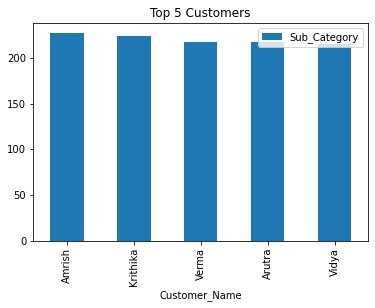

In [31]:
#Checking the customer with the most patronage and plotting the graph with bar chart
sales_record.groupby('Customer_Name')[['Sub_Category']].count().sort_values(by='Sub_Category',ascending=False).head(5).plot.bar()
plt.title('Top 5 Customers')
plt.show()

## In what year did the supermart make the highest average profit?

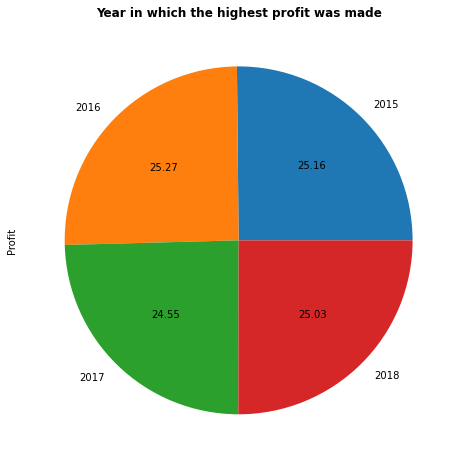

In [40]:
#Checking the year with the highest profit and Plotting a pie chart for it
sales_record.groupby("Year")["Profit"].mean().plot(kind="pie", autopct='%.2f' ,figsize=(8,8))
plt.title("Year in which the highest profit was made", fontweight='bold',)
plt.show()

# The Supermart made the highest profit in year 2016 - This is in the form of Average

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

In [32]:
# Refer to converted python date under data cleaning
#sales_record["Order_Date"]=pd.to_datetime(sales_record["Order_Date"])

In [33]:
#To find the year in the date and renaming the Order_Date
sales_record["Year"] = sales_record["Order_Date"].dt.year

In [39]:
#sales_record["Year"]

0       2017
1       2017
2       2017
3       2016
4       2016
        ... 
9989    2015
9990    2015
9991    2017
9992    2018
9993    2018
Name: Year, Length: 9994, dtype: int64

<AxesSubplot:>

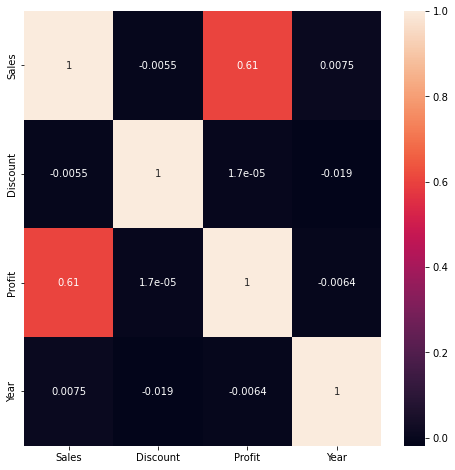

In [42]:
# Multivariate analysis cells
# Correlation between sales, profit, and discount

plt.figure(figsize=(8,8))
sns.heatmap(sales_record.corr(),annot=True)

## From the chart above we can see that there is positive correlation betwween sales and profit.

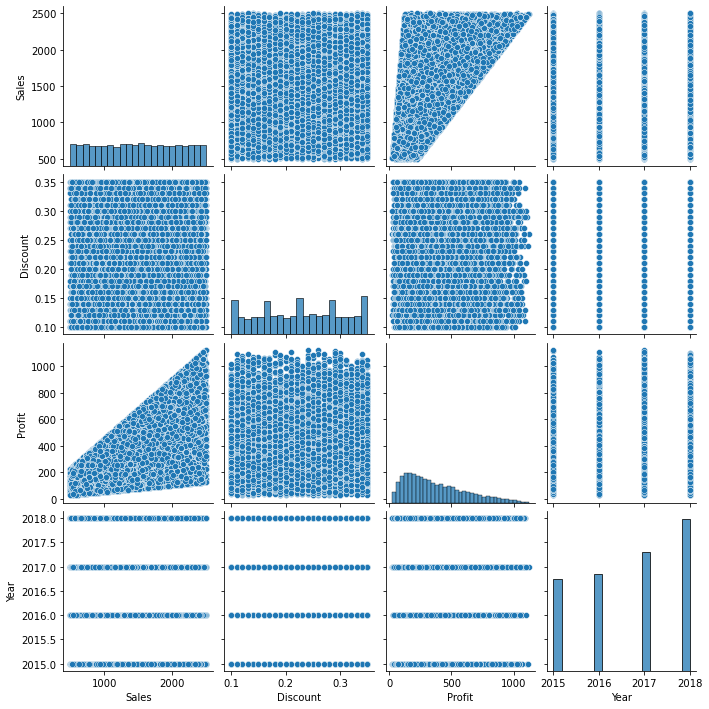

In [36]:
#multivariate analysis cells
#Using pairplot to check the relationship of the dataset
sns.pairplot(sales_record)

1. Scatter plots showing either positive linear relationships between Profit & Sales.
2. Histograms in the diagonal boxes that show the distribution of individual features (Sales, Discount, Profit and Year)
3. While the other graphs show the mirror of one another at the bottom and upper right

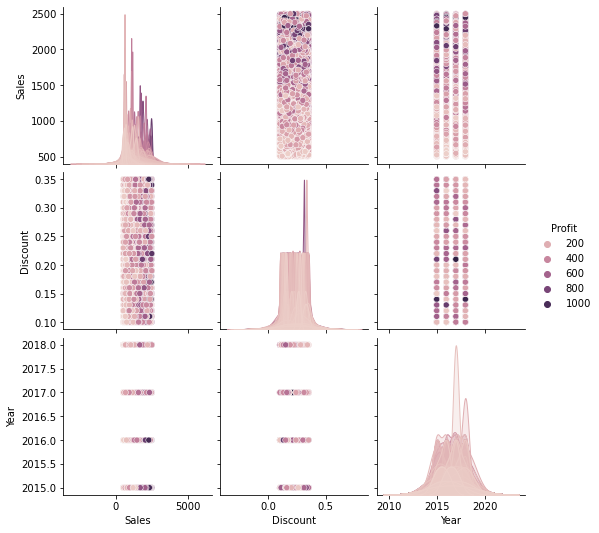

In [52]:
#Checking the Profit and trying to use a different color attribute to distinguish it
sns.pairplot(
    data=sales_record, 
    aspect=.85,
    hue= 'Profit');

1. From the top row (index 0), Highest sales is around 2,500 and at most likely item worth 200
2. Second row at the middle (index 1) shows the highest discounts is around items worth 200 and 1000
3. In the last row (index 2) shows the hight profit was made around 2018

In [54]:
#Calling our data set to see what other multivariate we can achieve
sales_record.head(10)

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.26,322.70,Tamil Nadu,2015
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,West,826,0.33,346.92,Tamil Nadu,2015
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,West,1847,0.32,147.76,Tamil Nadu,2015
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,West,791,0.23,181.93,Tamil Nadu,2015
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,West,1795,0.27,484.65,Tamil Nadu,2015


In [57]:
#multivariate analysis cells
#Creating a pivot to see our Sub_Category items against our Category and the total profit made by each Sub_Category
pivot = sales_record.groupby(['Category', 'Sub_Category']).Profit.mean().astype(int).unstack('Sub_Category')

pivot

Sub_Category,Atta & Flour,Biscuits,Breads & Buns,Cakes,Chicken,Chocolates,Cookies,Dals & Pulses,Edible Oil & Ghee,Eggs,...,Health Drinks,Masalas,Mutton,Noodles,Organic Fruits,Organic Staples,Organic Vegetables,Rice,Soft Drinks,Spices
Category,,,,,,,,,,,,,,,,,,,,,
Bakery,NaN,368.0,380.0,372.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.0,NaN
"Eggs, Meat & Fish",NaN,NaN,NaN,NaN,356.0,NaN,NaN,NaN,NaN,381.0,...,NaN,NaN,384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food Grains,362.0,NaN,NaN,NaN,NaN,NaN,NaN,379.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,387.0,NaN,384.0,NaN,NaN
Fruits & Veggies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,376.0,NaN,385.0,NaN,NaN,NaN
Oil & Masala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,NaN,...,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.0
Snacks,NaN,NaN,NaN,NaN,NaN,368.0,366.0,NaN,NaN,NaN,...,NaN,NaN,NaN,391.0,NaN,NaN,NaN,NaN,NaN,NaN


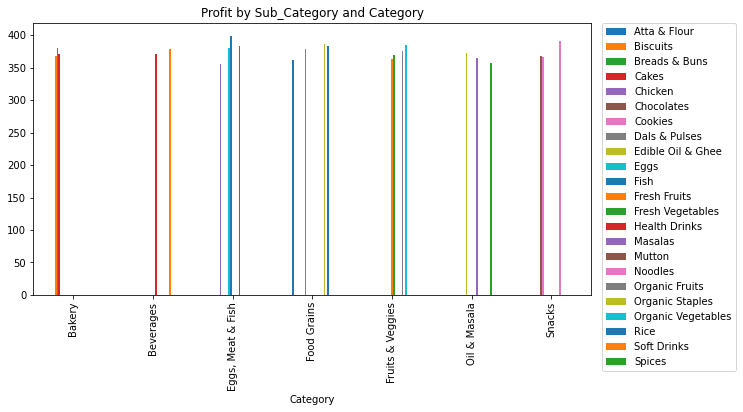

In [71]:
#Plotting the pivot to show the 
pivot.plot.bar(figsize=(10,5), legend = True)#we use figsize parameter to set the height and width of the chart
plt.ticklabel_format(style='plain',axis='y') #write out the prices on y axis in full not scientific notation

plt.title('Profit by Sub_Category and Category')

#To move legend out of the chart to the center right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#Display Chart
plt.show()

## Profit can be seen in each categories and the bars shows which Sub_Categories have the highest profit.

For example, in under Category "Eggs, Meat & Fish, Fish Sub_Category provides the highest profit among the Category and this Category happens to be the Category with the highes profit as well. Judging by the legend and scale.

# Summary

In this markdown cell, summarize your list of findings.

From our analysis of the data from the Supermart, we realized that:

1. The West Region made the most profit.
2. Vellore City generated the highest profit.
3. The Category that made the most Profit was Snacks, followed closely by Eggs,Meat & Fish.
4. Snacks was the most patronized Category with 15.15%
5. Amrish was the customer who patronized the supermart the most.
6. The highest average profit was recorded in 2016 and total profit in 2018.
7. There is positive correlation betwween sales and profit.